![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

## Import required libraries for the project

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

## Read in the data

In [86]:
schools = pd.read_csv("schools.csv")

## Preview the data

In [87]:
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


## Questions

In [88]:
# 1. Which NYC schools have the best math results? (The best math results are at least 80% of the *maximum possible score of 800* for math)
# 2. What are the top 10 performing schools based on the combined SAT scores?
#3. Which single borough has the largest standard deviation in the combined SAT score? (Save your results as a pandas DataFrame called largest_std_dev.
#The DataFrame should contain one row, with:
#"borough" - the name of the NYC borough with the largest standard deviation of "total_SAT".
#"num_schools" - the number of schools in the borough.
#"average_SAT" - the mean of "total_SAT".
#"std_SAT" - the standard deviation of "total_SAT".) 

## Data manipulation

In [89]:
#To determine the NYC schools with at least 80% math score, we need to create a new column called math percentage
schools["math_percentage"] = round((schools["average_math"]/800)*100)

In [90]:
#To get the top 10 performing schools based on the combined SAT scores, we need to create a new column called total_SAT
schools["total_SAT"] = (schools["average_math"] + schools["average_reading"] + schools["average_writing"])

In [91]:
# To identify the single borough with the highest standard deviation in the combined SAT score, we need to calculate the standard deviation of combined SAT scores for each borough and save as a column called "borough_std_dev"
schools['borough_std_dev'] = schools.groupby("borough")["total_SAT"].transform('std')

## Answering Question 1

In [92]:
#Recall that the criteria for being a best math school is having at least 80% math percentage. 
#Subset for schools with at least 80% math percentage
best_math_schools = schools[schools["math_percentage"] >= 80][["school_name", "average_math"]].sort_values(by="average_math", ascending=False)


In [93]:
#Save the result as a DataFrame
best_math_schools = pd.DataFrame(best_math_schools)
print("The best math schools in NYC:")
best_math_schools

The best math schools in NYC:


,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683
280,Brooklyn Technical High School,682
333,Townsend Harris High School,680
174,High School of American Studies at Lehman College,669
0,"New Explorations into Science, Technology and ...",657
45,Eleanor Roosevelt High School,641


## Answering Question 2

In [94]:
#Select the top 10 schools with the highest total_SAT score
top_10_schools = schools.sort_values(by="total_SAT", ascending=False)[["school_name", "total_SAT"]].head(10)

In [95]:
#Save the result as a DataFrame
top_10_schools = pd.DataFrame(top_10_schools)
print("These are the top 10 schools:")
top_10_schools

These are the top 10 schools:


,school_name,total_SAT
88,Stuyvesant High School,2144
170,Bronx High School of Science,2041
93,Staten Island Technical High School,2041
174,High School of American Studies at Lehman College,2013
333,Townsend Harris High School,1981
365,Queens High School for the Sciences at York Co...,1947
5,Bard High School Early College,1914
280,Brooklyn Technical High School,1896
45,Eleanor Roosevelt High School,1889
68,"High School for Mathematics, Science, and Engi...",1889


## Answering Question 3

In [96]:
# Find the borough with the highest standard deviation
largest_std_dev_borough = schools.loc[schools['borough_std_dev'].idxmax()]

In [97]:
# Extracting relevant information for the largest standard deviation borough (this is be needed in creating the DataFrame to answer question 3)
borough_name = largest_std_dev_borough['borough']
num_schools = len(schools[schools['borough'] == borough_name])
average_SAT = round(schools[schools['borough'] == borough_name]['total_SAT'].mean(), 2)
std_SAT = round(schools[schools['borough'] == borough_name]['total_SAT'].std(), 2)

In [98]:
# Create DataFrame with the extracted information
largest_std_dev = pd.DataFrame({
    'borough': [borough_name],
    'num_schools': [num_schools],
    'average_SAT': [average_SAT],
    'std_SAT': [std_SAT]
})
print("3. The single borough with the largest standard deviation in the combined SAT score:")
largest_std_dev.head()

3. The single borough with the largest standard deviation in the combined SAT score:


,borough,num_schools,average_SAT,std_SAT
0,Manhattan,89,1340.13,230.29


## Visualizing the findings

## Fig_1

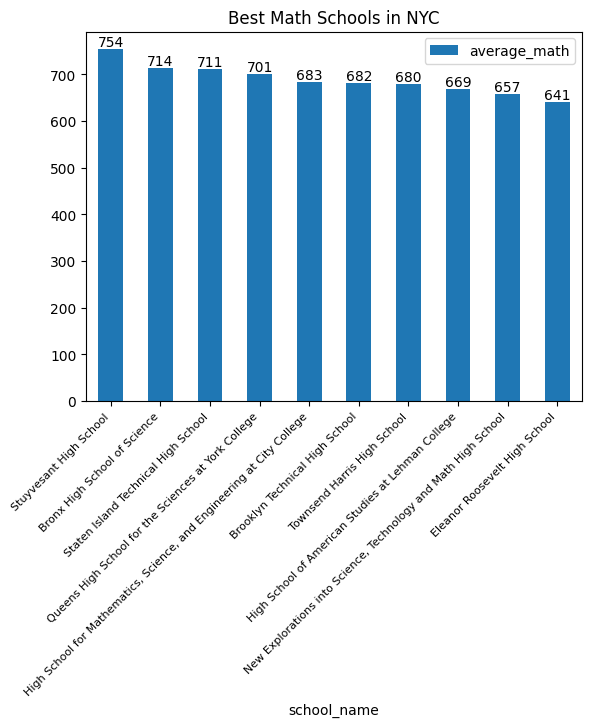

In [99]:
#Create a bar chart using the "best_math_schools" dataframe. 
Fig_1 = best_math_schools.plot(kind = "bar",x = "school_name", y = "average_math", title = "Best Math Schools in NYC", )

# Rotating and resizing x-axis labels
Fig_1.set_xticklabels(Fig_1.get_xticklabels(), rotation=45, ha='right', fontsize=8)

# Adding data labels to the bars
for p in Fig_1.patches:
    Fig_1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

## Fig_2

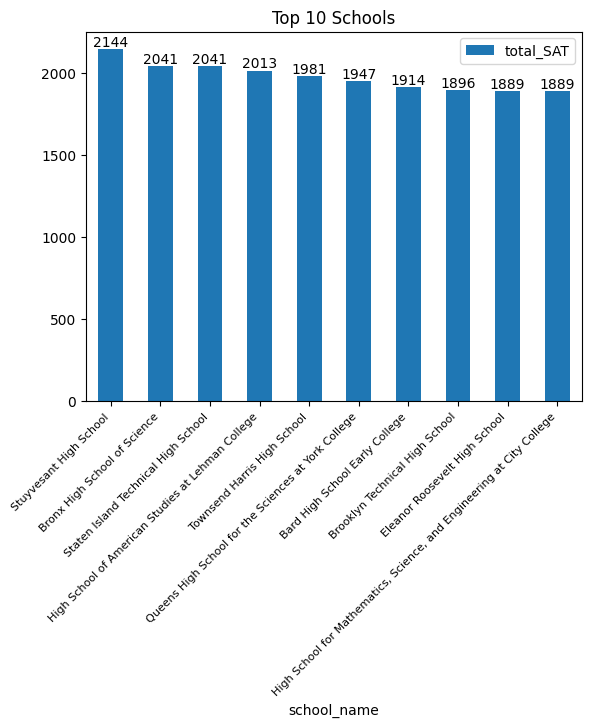

In [100]:
#Creating a bar chart using the "top_10_schools" DataFrame
Fig_2 = top_10_schools.plot(kind = "bar", x = "school_name", y = "total_SAT", title = "Top 10 Schools")

# Rotating and resizing x-axis labels
Fig_2.set_xticklabels(Fig_2.get_xticklabels(), rotation=45, ha='right', fontsize=8)

# Adding data labels to the bars
for p in Fig_2.patches:
    Fig_2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()